In [1]:
install.packages(c("readxl", "dplyr", "proxy"))

also installing the dependencies 'cli', 'lifecycle', 'pillar', 'rlang', 'tibble', 'tidyselect', 'vctrs'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'cli' 'rlang' 'tibble' 'vctrs' 'readxl'
  'dplyr' 'proxy'


  These will not be installed


installing the source packages 'lifecycle', 'pillar', 'tidyselect'

Warning message in install.packages(c("readxl", "dplyr", "proxy")):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages(c("readxl", "dplyr", "proxy")):
"installation of package 'pillar' had non-zero exit status"Warning message in install.packages(c("readxl", "dplyr", "proxy")):
"installation of package 'tidyselect' had non-zero exit status"

In [2]:
library(readxl)
library(dplyr)
library(proxy)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'proxy' was built under R version 3.6.3"
Attaching package: 'proxy'

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix



In [3]:
dfc <- read_excel("WEATHERMAIN.xlsx")
head(dfc)

state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,seventy_fifth_percentile,fiftieth_percentile,tenth_percentile,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
37,021,0032,45201,1,35.55833,-82.52083,WGS84,Benzene,3,...,8.0,7.7,1.8,LONDON RD ASHVILLE NC 28803,North Carolina,Buncombe,Asheville,11700,"Asheville, NC",2020-05-21
37,077,0001,45201,1,36.14111,-78.76806,WGS84,Benzene,B,...,2.9,2.0,1.3,800 Central Avenue,North Carolina,Granville,Butner,37080,"Oxford, NC",2020-05-21
37,119,0034,45201,1,35.24875,-80.76618,WGS84,Benzene,B,...,7.9,6.0,2.1,PLAZA ROAD AND LAKEDELL,North Carolina,Mecklenburg,Charlotte,16740,"Charlotte-Concord-Gastonia, NC-SC",2020-05-21
37,119,0034,45201,2,35.24875,-80.76618,WGS84,Benzene,3,...,14.6,6.4,1.7,PLAZA ROAD AND LAKEDELL,North Carolina,Mecklenburg,Charlotte,16740,"Charlotte-Concord-Gastonia, NC-SC",2020-05-21
37,159,0022,45201,1,35.53448,-80.66756,WGS84,Benzene,3,...,3.6,2.7,1.0,925 N ENOCHVILLE AVE,North Carolina,Rowan,China Grove,16740,"Charlotte-Concord-Gastonia, NC-SC",2020-05-21
37,159,0022,45201,2,35.53448,-80.66756,WGS84,Benzene,B,...,3.8,2.6,1.6,925 N ENOCHVILLE AVE,North Carolina,Rowan,China Grove,16740,"Charlotte-Concord-Gastonia, NC-SC",2020-05-21


In [4]:
num <- dfc[, c('latitude', 'longitude', 'arithmetic_mean')]
head(num)

latitude,longitude,arithmetic_mean
35.55833,-82.52083,5.830000
36.14111,-78.76806,2.285366
35.24875,-80.76618,6.302703
35.24875,-80.76618,8.986957
35.53448,-80.66756,3.566667
35.53448,-80.66756,2.960870


In [5]:
set.seed(333)
dist <- proxy::dist(as.matrix(num), method = "cosine")
h <- hclust(dist, method = "complete")

In [6]:
print(h)


Call:
hclust(d = dist, method = "complete")

Cluster method   : complete 
Distance         : cosine 
Number of objects: 21 



In [7]:
clust <- cutree(h, k = 2)
num$cluster <- clust

In [8]:
print(num)

# A tibble: 21 x 4
   latitude longitude arithmetic_mean cluster
      <dbl>     <dbl>           <dbl>   <int>
 1     35.6     -82.5            5.83       1
 2     36.1     -78.8            2.29       2
 3     35.2     -80.8            6.30       1
 4     35.2     -80.8            8.99       1
 5     35.5     -80.7            3.57       2
 6     35.5     -80.7            2.96       2
 7     36.0     -78.9            5.19       1
 8     36.0     -78.9            4.24       1
 9     35.0     -78.9            8.43       1
10     36.1     -78.5            3.14       2
# ... with 11 more rows


In [9]:
print(num$cluster)

 [1] 1 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 1 1 1 2


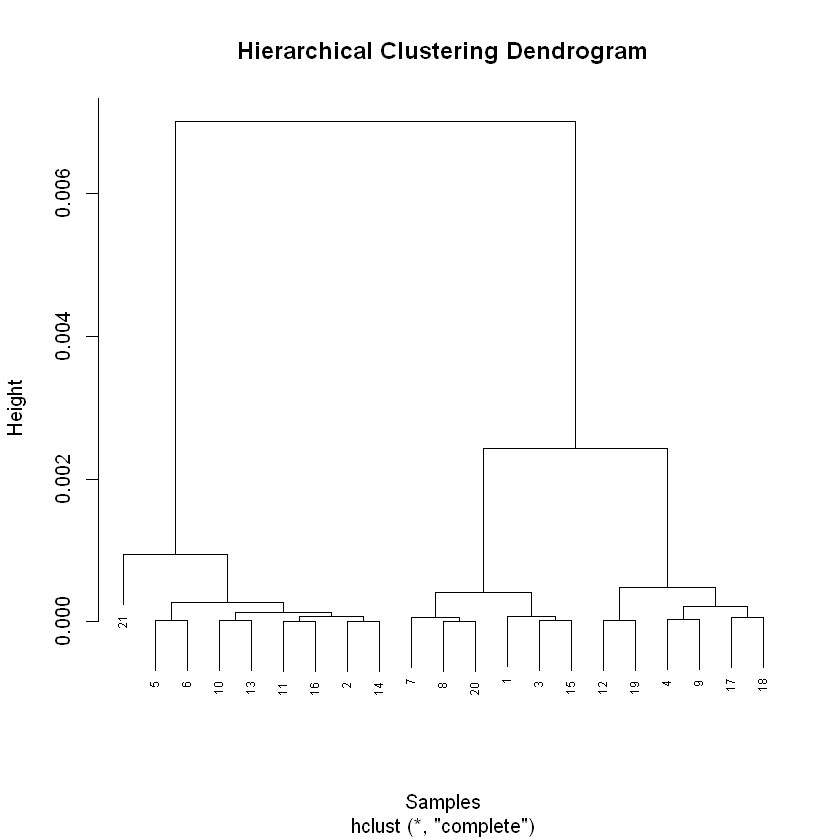

In [10]:
plot(h, cex = 0.6, main = "Hierarchical Clustering Dendrogram", xlab = "Samples")

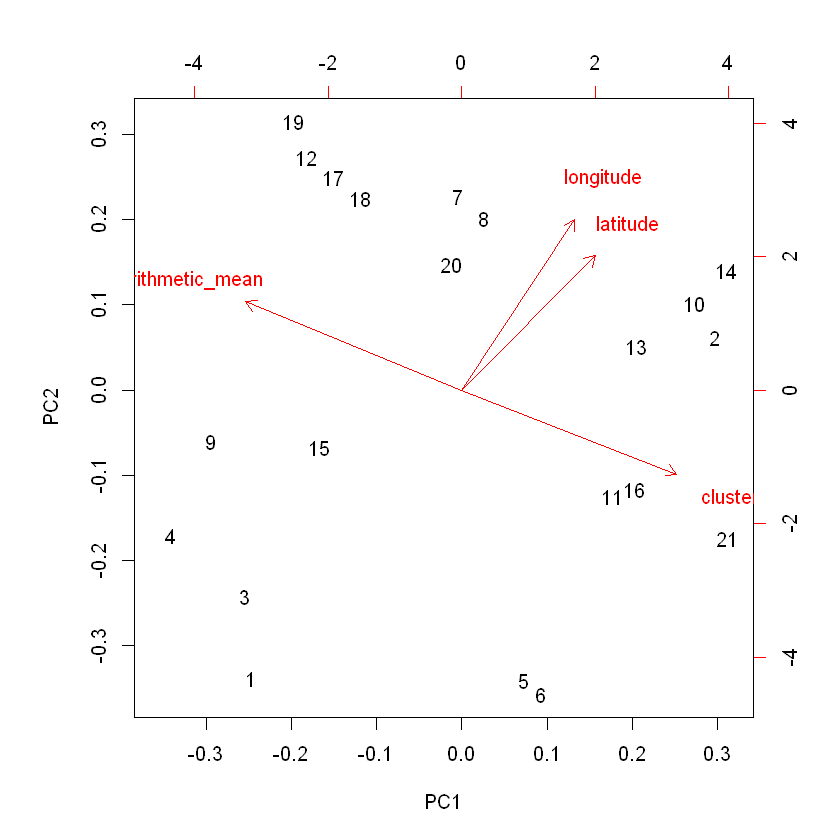

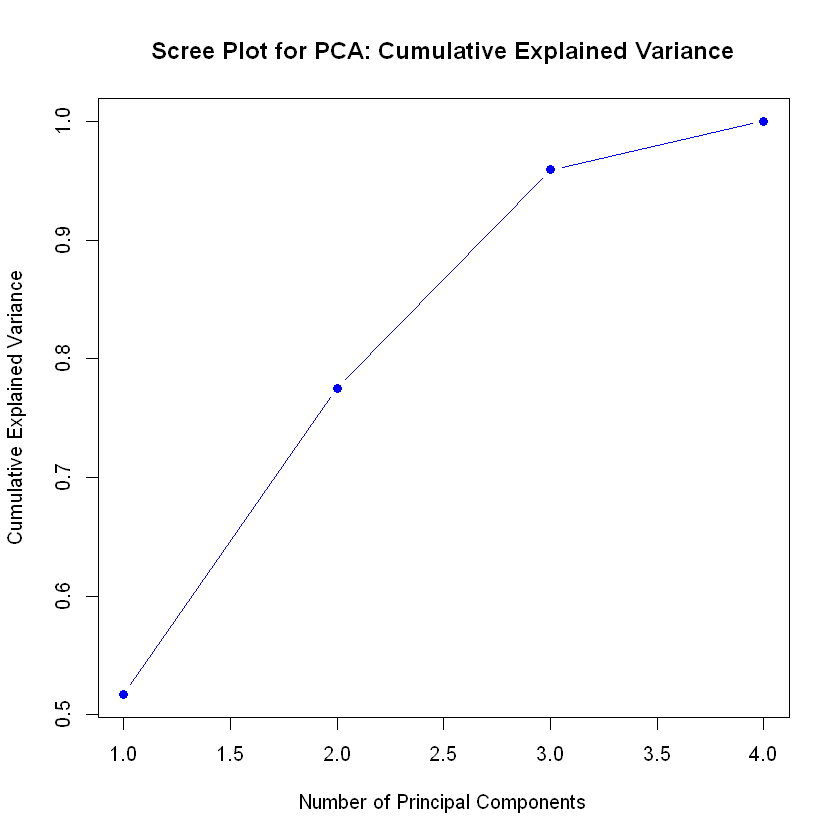

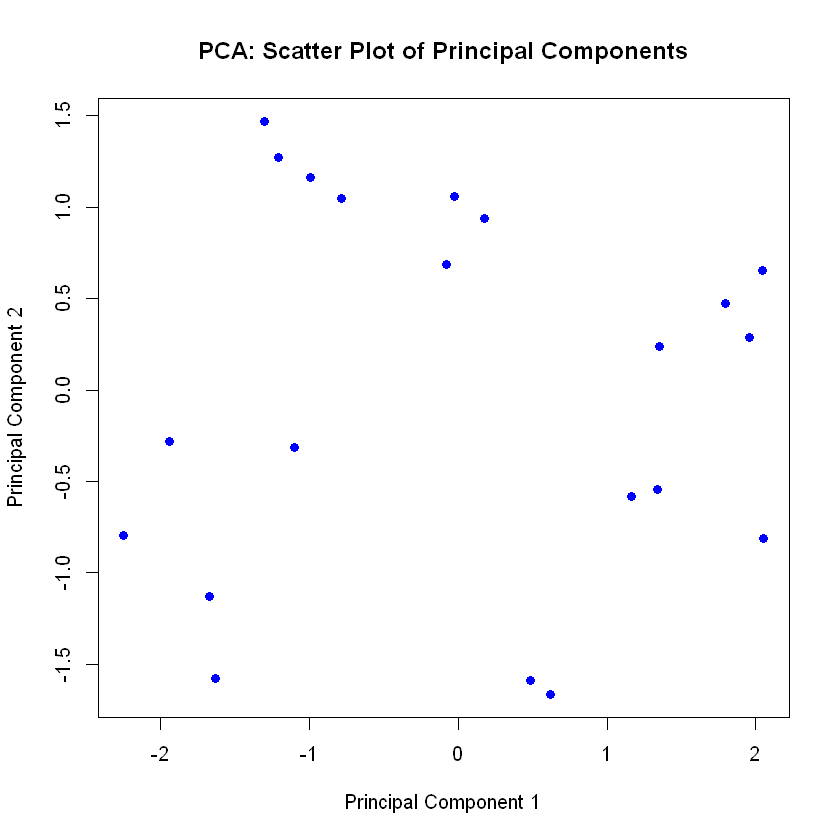

In [14]:
# numeric_data_pca <- dfc[, c('latitude', 'longitude', 'arithmetic_mean')]
pca_r <- prcomp(num, scale. = TRUE)
biplot(pca_r)
plot(1:length(pca_r$sdev), cumsum(pca_r$sdev^2) / sum(pca_r$sdev^2),
     type = 'b', pch = 19, col = 'blue', xlab = 'Number of Principal Components',
     ylab = 'Cumulative Explained Variance',
     main = 'Scree Plot for PCA: Cumulative Explained Variance')
plot(pca_r$x[, 1], pca_r$x[, 2], main='PCA: Scatter Plot of Principal Components',
     xlab='Principal Component 1', ylab='Principal Component 2', pch=16, col='blue')

[1] 1 2 1 1 2 2 2 2 1 2 2 1 2 2 1 2 1 1 1 2 2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

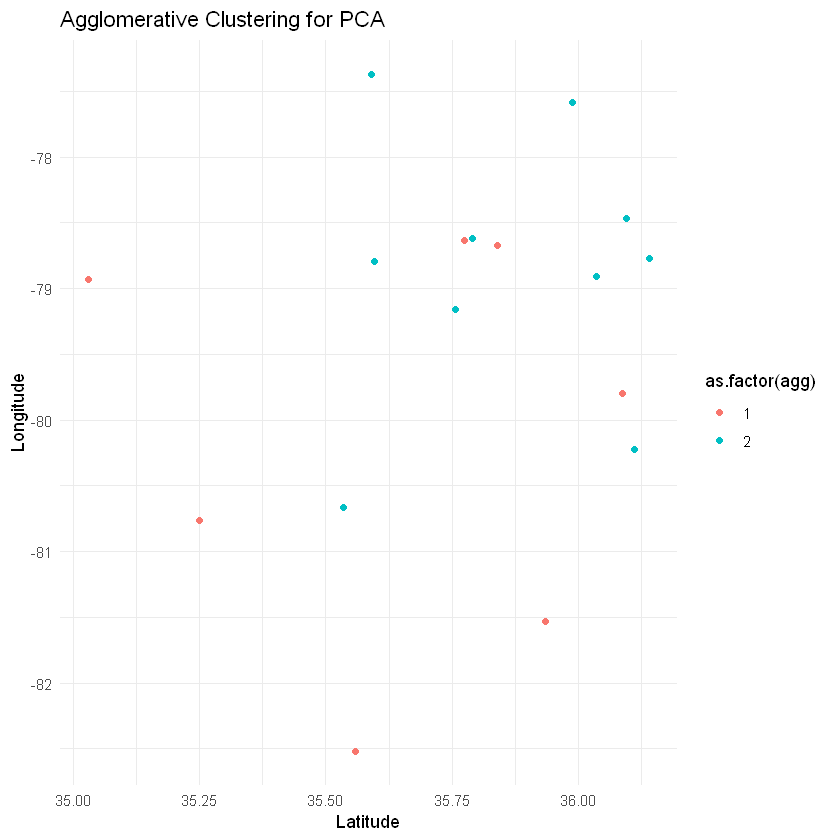

In [15]:
agg <- cutree(hclust(dist(num), method="complete"), k=2)
num$agg <- agg
num$agg
library(ggplot2)
ggplot(num, aes(x = latitude, y = longitude, color = as.factor(agg))) +
  geom_point() +
  ggtitle('Agglomerative Clustering for PCA') +
  xlab('Latitude') +
  ylab('Longitude') +
  theme_minimal()

[1] 1 2 1 3 2 2 2 2 3 2 2 3 2 2 1 2 3 3 3 2 2

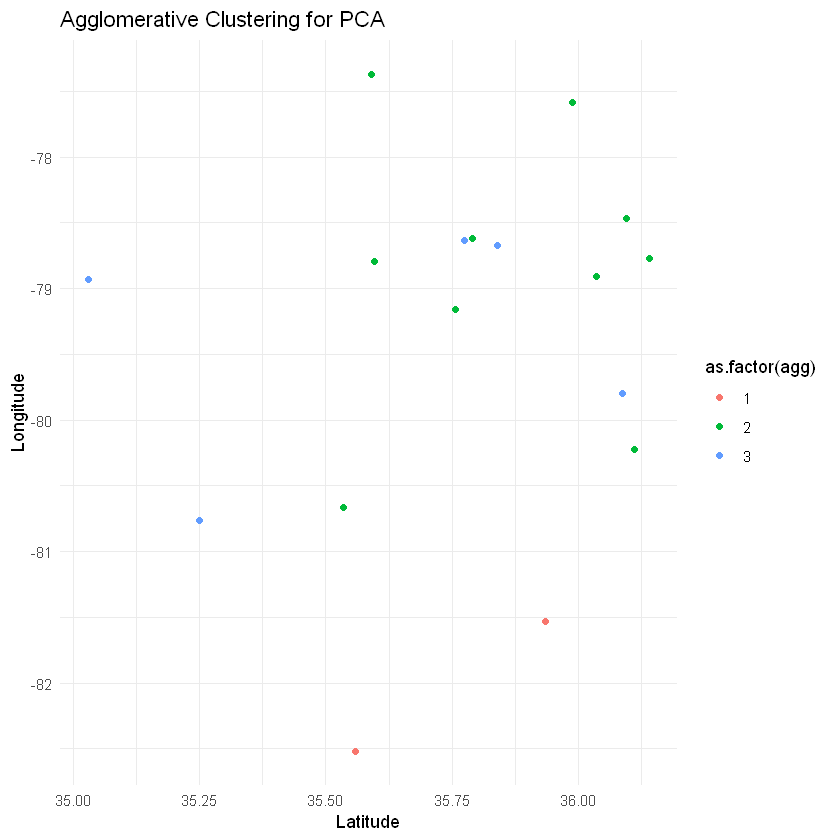

In [17]:
agg <- cutree(hclust(dist(num), method="complete"), k=3)
num$agg <- agg
num$agg
library(ggplot2)
ggplot(num, aes(x = latitude, y = longitude, color = as.factor(agg))) +
  geom_point() +
  ggtitle('Agglomerative Clustering for PCA') +
  xlab('Latitude') +
  ylab('Longitude') +
  theme_minimal()

[1] 1 2 1 3 2 2 2 2 3 2 2 3 2 2 1 2 3 3 3 2 4

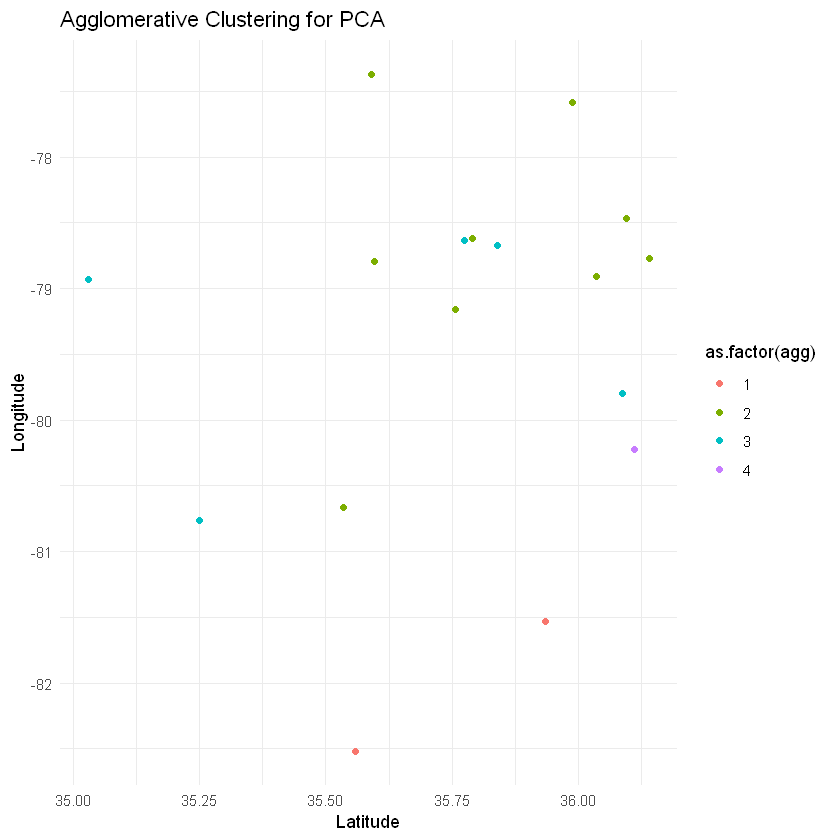

In [18]:
agg <- cutree(hclust(dist(num), method="complete"), k=4)
num$agg <- agg
num$agg
library(ggplot2)
ggplot(num, aes(x = latitude, y = longitude, color = as.factor(agg))) +
  geom_point() +
  ggtitle('Agglomerative Clustering for PCA') +
  xlab('Latitude') +
  ylab('Longitude') +
  theme_minimal()